In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.patches import Polygon

In [2]:
bicycle_image = cv2.imread('./cropped_frames/bicycle.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
# Detect features in the bicycle image
sift = cv2.SIFT_create()
bicycle_keypoints, bicycle_descriptors = sift.detectAndCompute(bicycle_image, None)

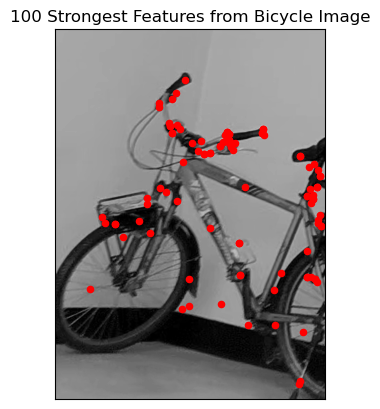

In [7]:
# Display the bicycle image with the strongest feature points
fig, ax = plt.subplots()
ax.imshow(bicycle_image, cmap='gray')
ax.set_title('100 Strongest Features from Bicycle Image')
keypoints = sorted(bicycle_keypoints, key=lambda x: -x.response)[:100]
for kp in keypoints:
    ax.scatter(kp.pt[0], kp.pt[1], s=20, color='red', marker='o')
ax.set_xticks([])  # Hide x-axis tick labels
ax.set_yticks([])  # Hide y-axis tick labels
plt.show()

In [8]:
folder_path = 'frames'
files = os.listdir(folder_path)

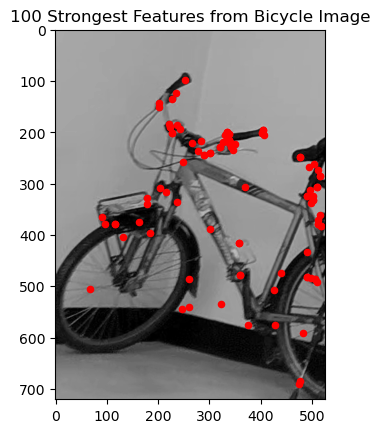

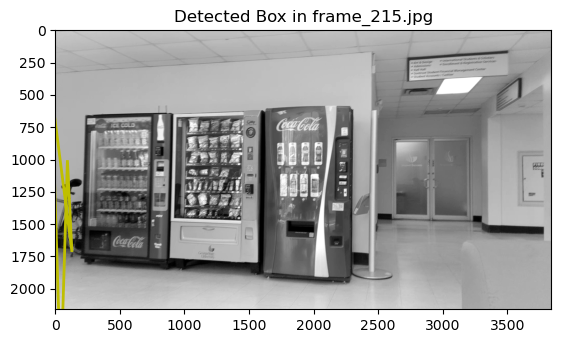

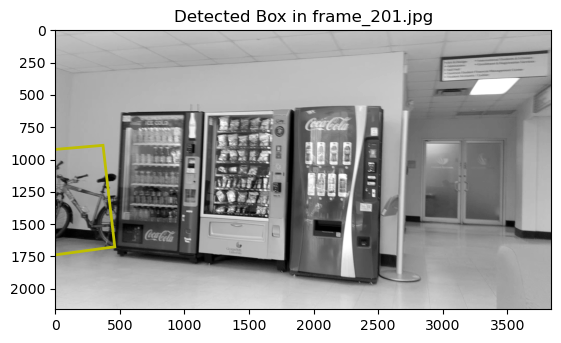

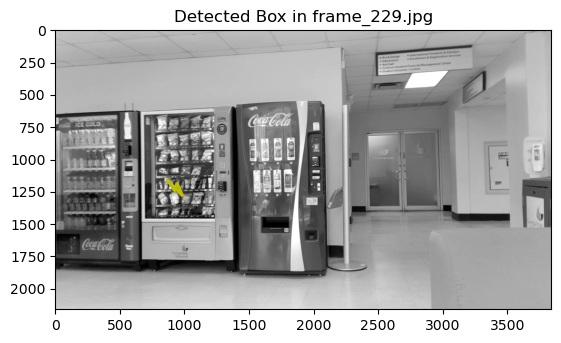

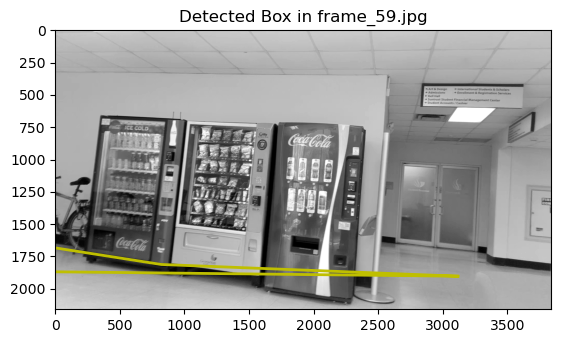

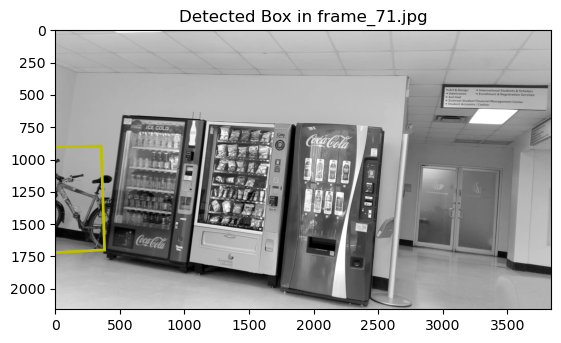

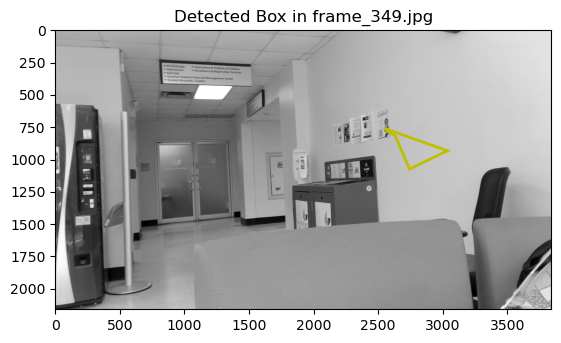

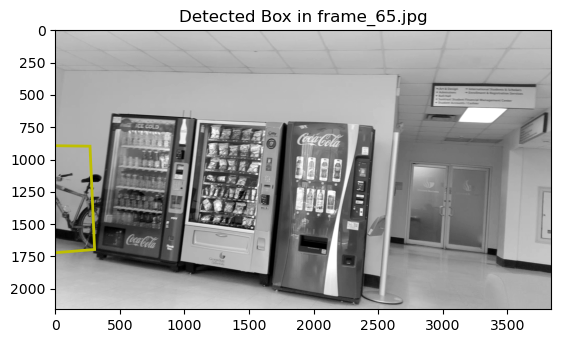

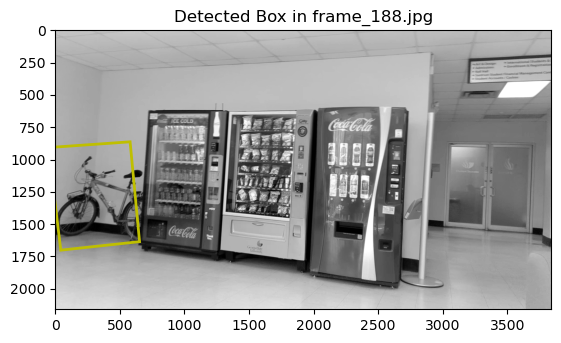

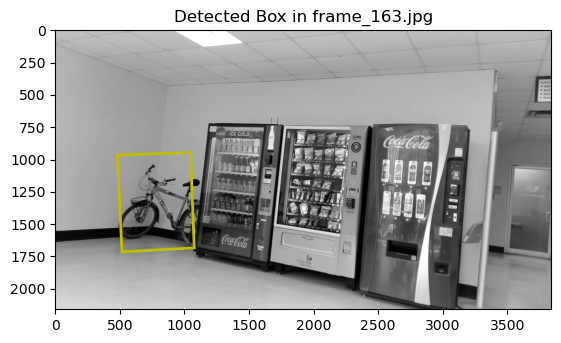

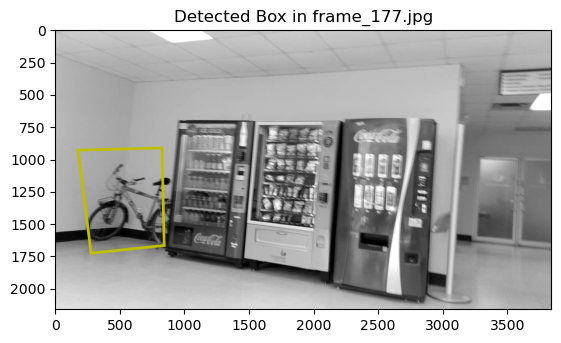

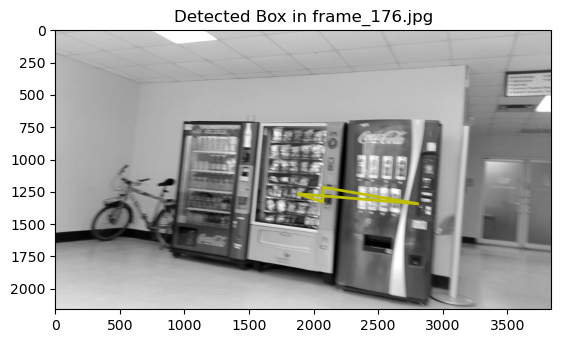

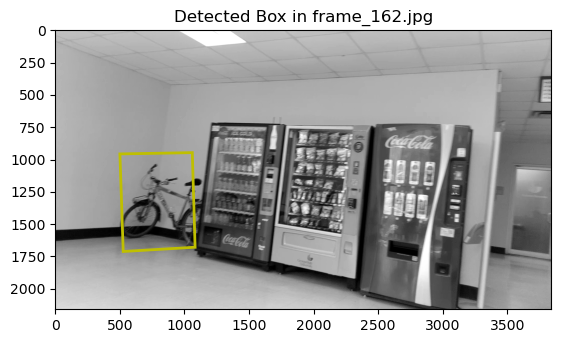

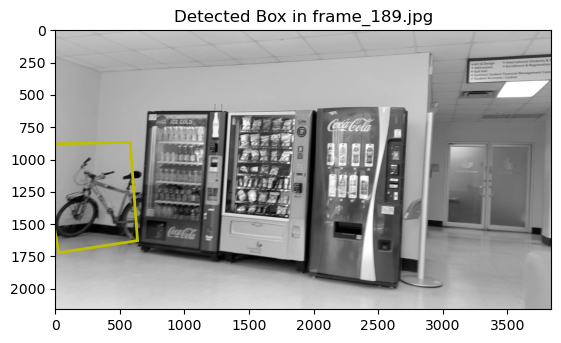

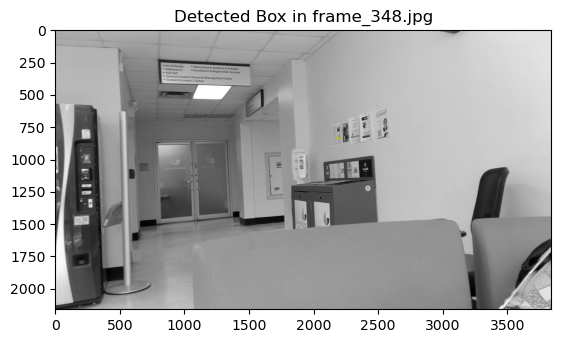

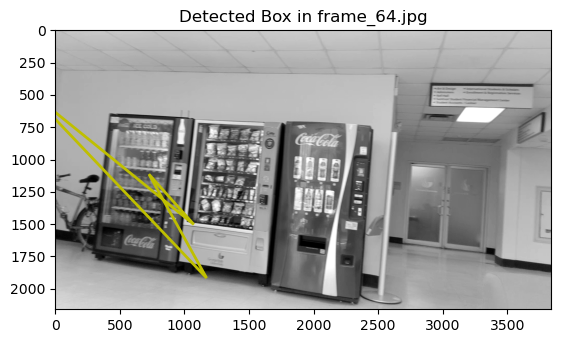

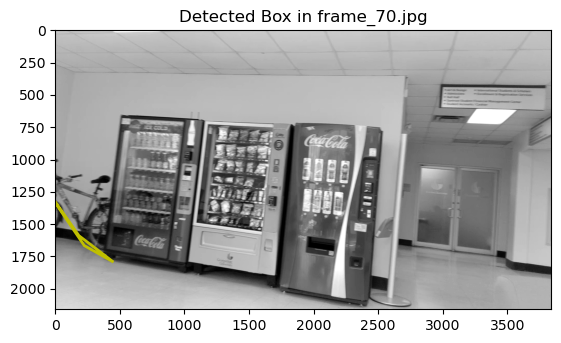

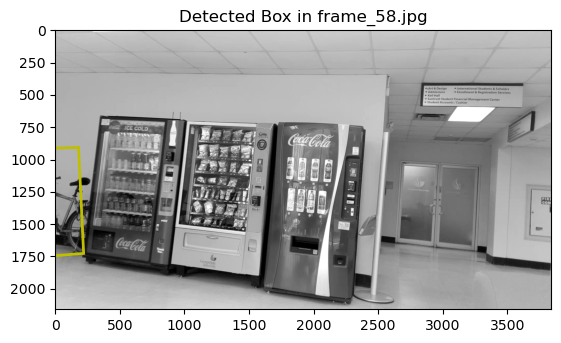

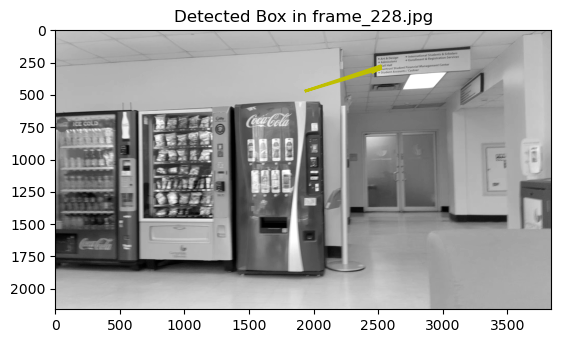

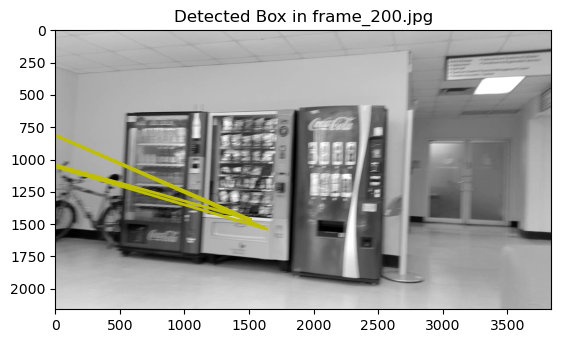

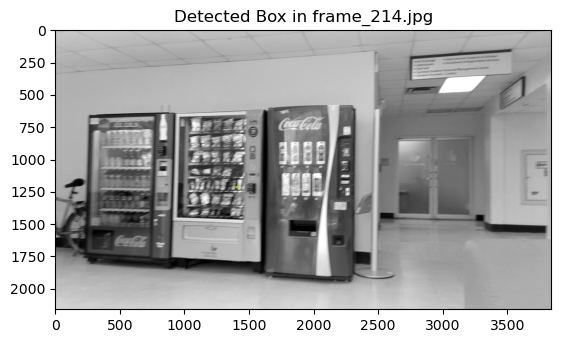

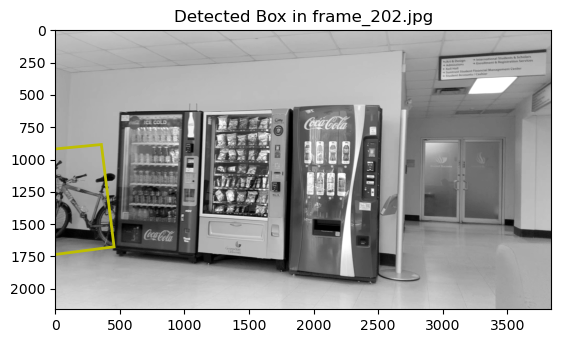

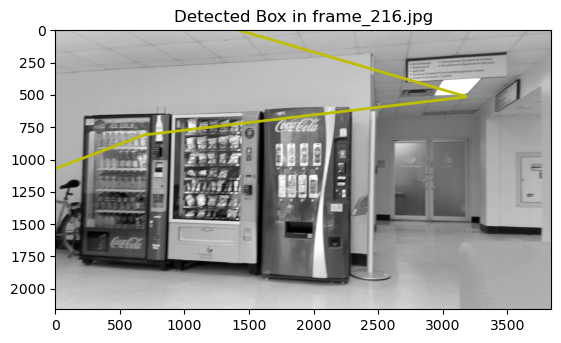

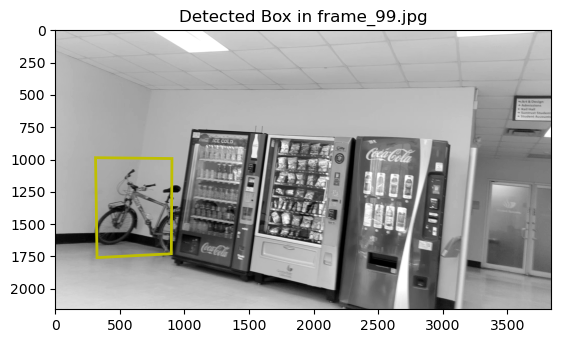

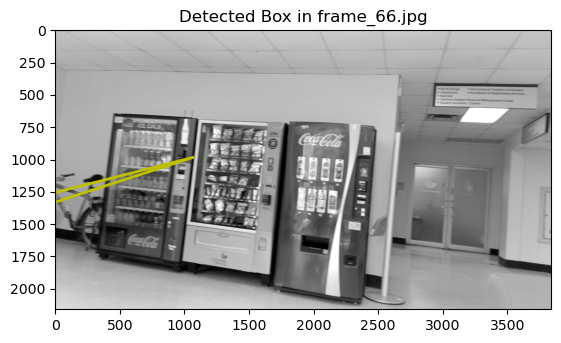

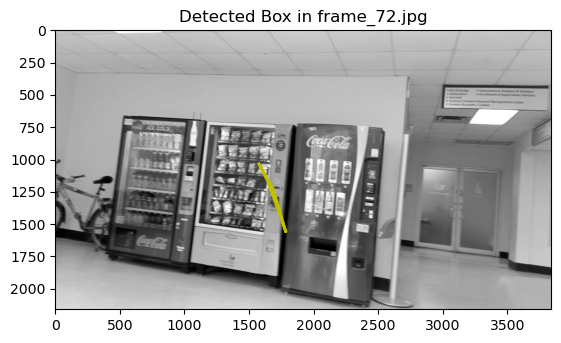

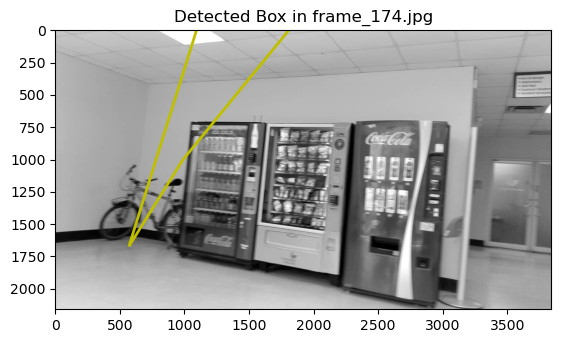

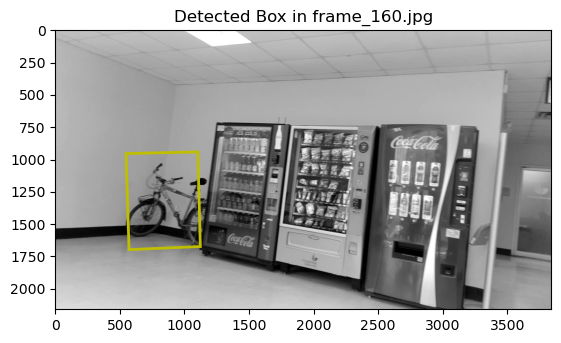

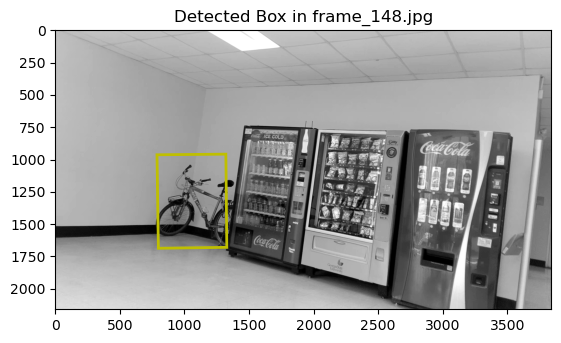

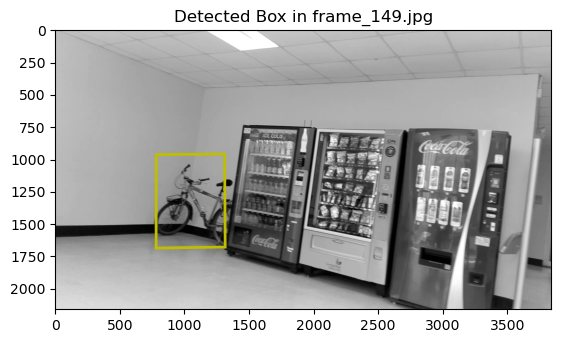

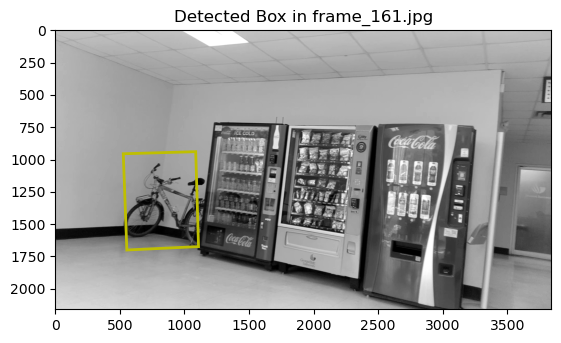

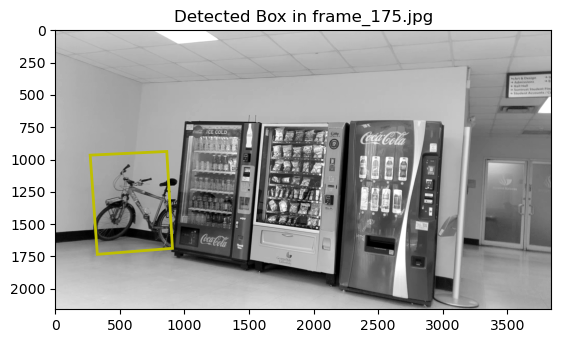

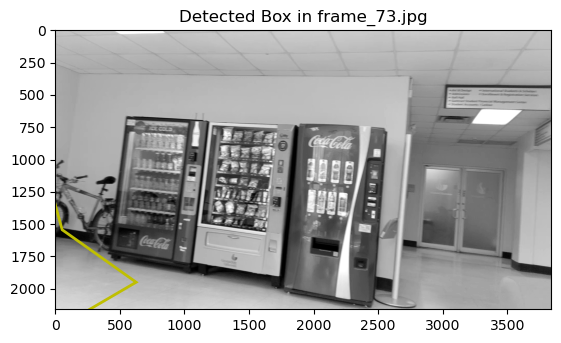

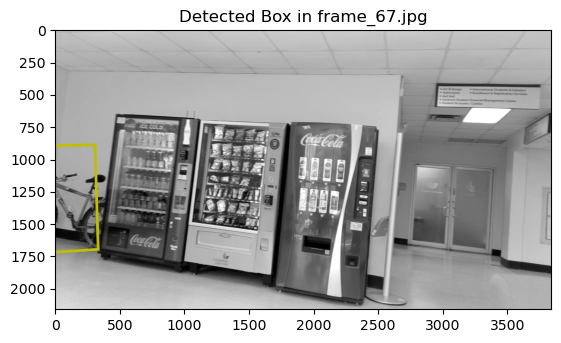

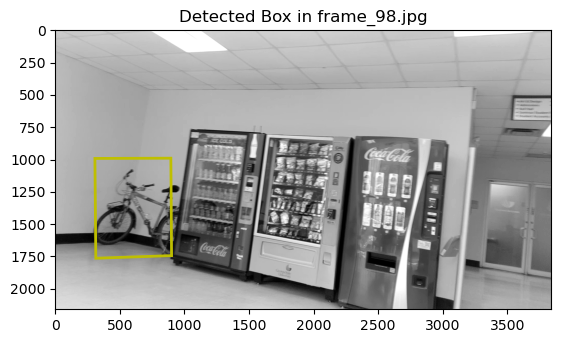

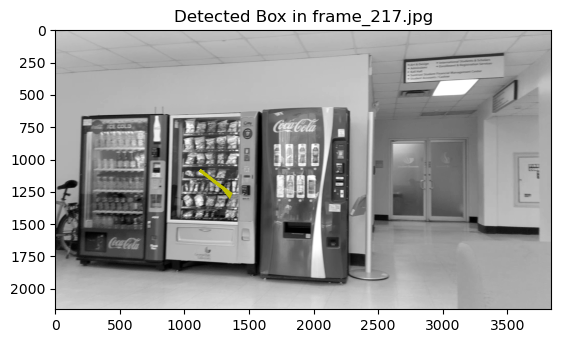

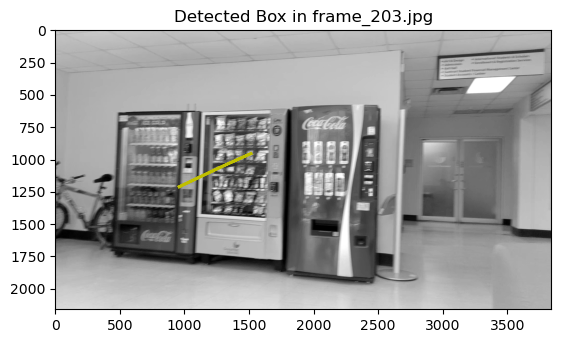

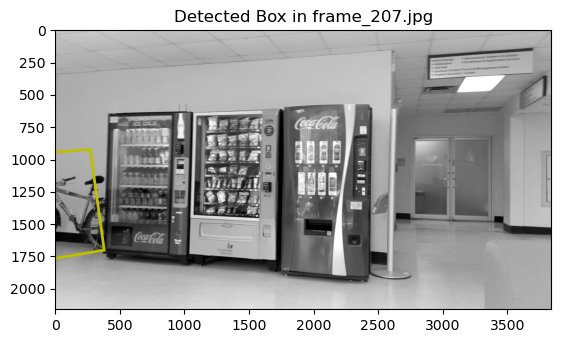

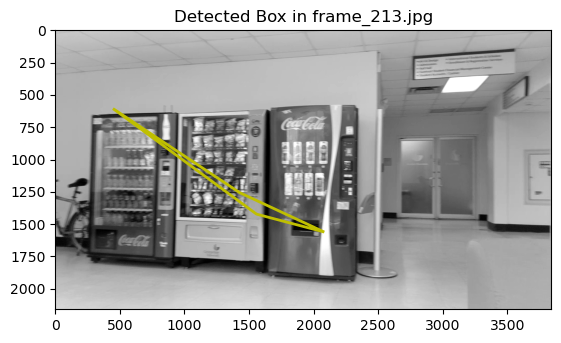

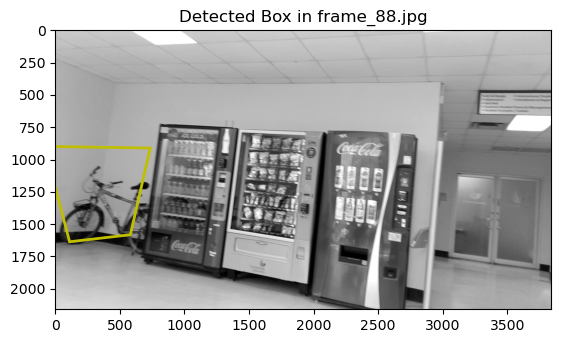

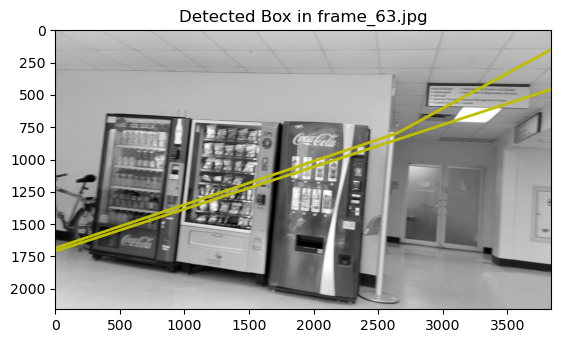

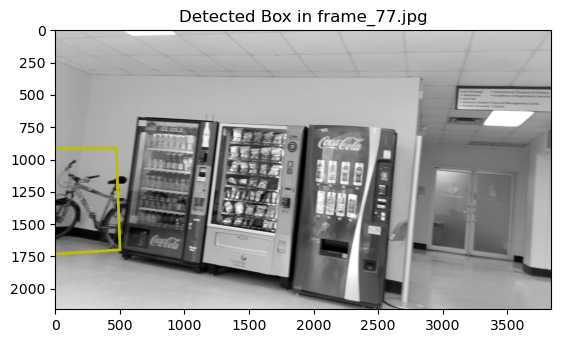

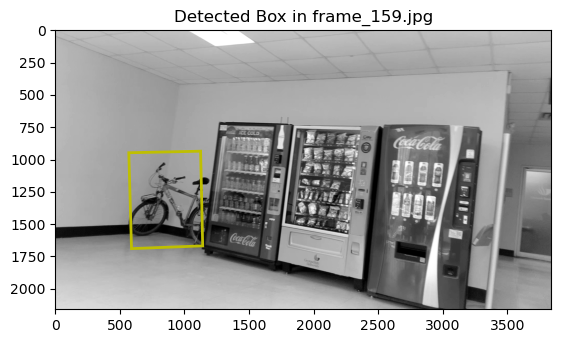

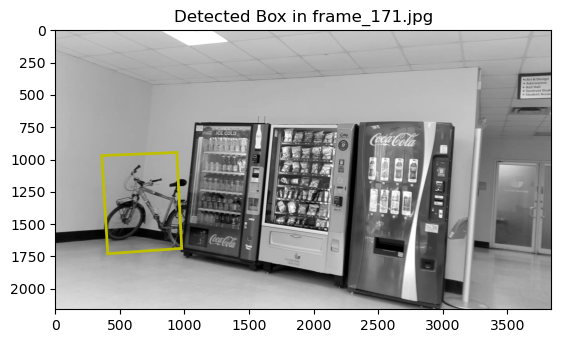

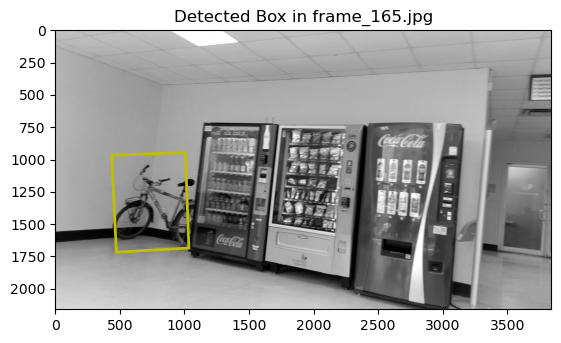

In [ ]:
for filename in files:
    if filename.endswith('.jpg'):
        frame_path = os.path.join(folder_path, filename)
        scene_image = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        
        # Detect and match features
        scene_keypoints, scene_descriptors = sift.detectAndCompute(scene_image, None)
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        matches = bf.match(bicycle_descriptors, scene_descriptors)
        
        # Filter matches and estimate the transformation
        if len(matches) > 4:
            src_pts = np.float32([bicycle_keypoints[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
            dst_pts = np.float32([scene_keypoints[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
            
            matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            if matrix is not None:
                # Define the polygon around the bicycle image
                h, w = bicycle_image.shape
                pts = np.float32([[0, 0], [w, 0], [w, h], [0, h], [0, 0]]).reshape(-1, 1, 2)
                dst = cv2.perspectiveTransform(pts, matrix)
                
                # Plot the detected bicycle in the scene image
                fig, ax = plt.subplots()
                ax.imshow(scene_image, cmap='gray')
                polygon = Polygon(dst.reshape(-1, 2), edgecolor='y', facecolor='none', linewidth=2)
                ax.add_patch(polygon)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_title(f'Detected Box in {filename}')
                plt.show()
            else:
                print(f"Failed to find a valid transformation for {filename}")
        else:
            print(f"Not enough matches are found - {len(matches)}/{len(bicycle_keypoints)}")
